<a href="https://colab.research.google.com/github/narayana111100/capstone-project-2/blob/main/Fraud_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from sklearn import preprocessing
from sklearn.linear_model import TweedieRegressor

In [3]:
df = pd.read_csv('/content/transactions_train.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
43481,9,PAYMENT,13943.77,C1998838780,180.0,0.0,M324211550,0.00,0.00,0.0
43482,9,PAYMENT,5069.25,C53113829,0.0,0.0,M971933851,0.00,0.00,0.0
43483,9,TRANSFER,1805804.86,C1358645345,3360.0,0.0,C1329956939,157032.18,1962837.03,0.0
43484,9,PAYMENT,16166.68,C1538881731,12316.0,0.0,M199007498,0.00,0.00,0.0
43485,9,CASH_OUT,319830.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43486 entries, 0 to 43485
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            43486 non-null  int64  
 1   type            43486 non-null  object 
 2   amount          43486 non-null  float64
 3   nameOrig        43485 non-null  object 
 4   oldbalanceOrig  43485 non-null  float64
 5   newbalanceOrig  43485 non-null  float64
 6   nameDest        43485 non-null  object 
 7   oldbalanceDest  43485 non-null  float64
 8   newbalanceDest  43485 non-null  float64
 9   isFraud         43485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [7]:
df.shape

(43486, 10)

In [8]:
print('the number of columns and rows present: ',df.shape)

the number of columns and rows present:  (43486, 10)


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrig    1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


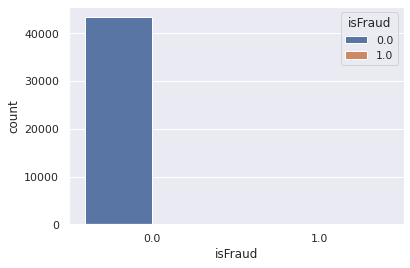

In [12]:


sns.countplot(df['isFraud'],hue=df['isFraud'])

In [13]:

df['isFraud'].value_counts()/len(df)*100

0.0    99.781539
1.0     0.216162
Name: isFraud, dtype: float64

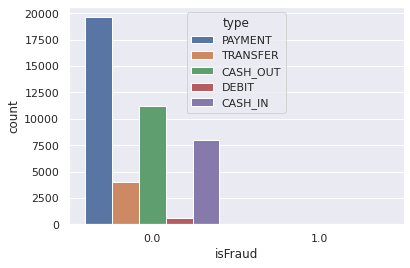

In [14]:
sns.countplot(x=df['isFraud'],hue=df['type'])


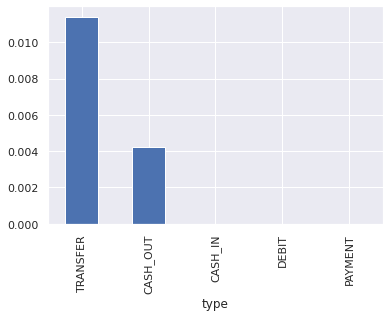

In [15]:
df.groupby('type')['isFraud'].mean().sort_values(ascending=False).plot(kind='bar')

In [16]:
df['type'].value_counts()/len(df)*100


PAYMENT     45.150163
CASH_OUT    25.934784
CASH_IN     18.274847
TRANSFER     9.274249
DEBIT        1.365957
Name: type, dtype: float64

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [18]:
df.corr()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.079468,-0.032171,-0.032457,0.001059,0.015209,-0.050899
amount,0.079468,1.000000,0.014299,0.003725,0.285190,0.399789,0.057827
oldbalanceOrig,-0.032171,0.014299,1.000000,0.998394,0.126012,0.092406,-0.004692
newbalanceOrig,-0.032457,0.003725,0.998394,1.000000,0.128829,0.092256,-0.015312
oldbalanceDest,0.001059,0.285190,0.126012,0.128829,1.000000,0.930445,-0.012438
newbalanceDest,0.015209,0.399789,0.092406,0.092256,0.930445,1.000000,-0.008178
isFraud,-0.050899,0.057827,-0.004692,-0.015312,-0.012438,-0.008178,1.000000


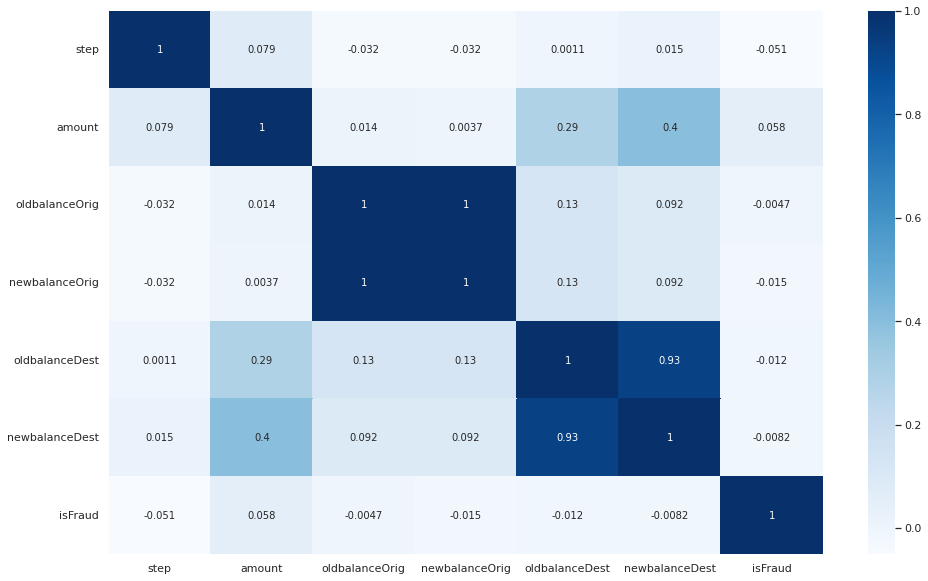

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

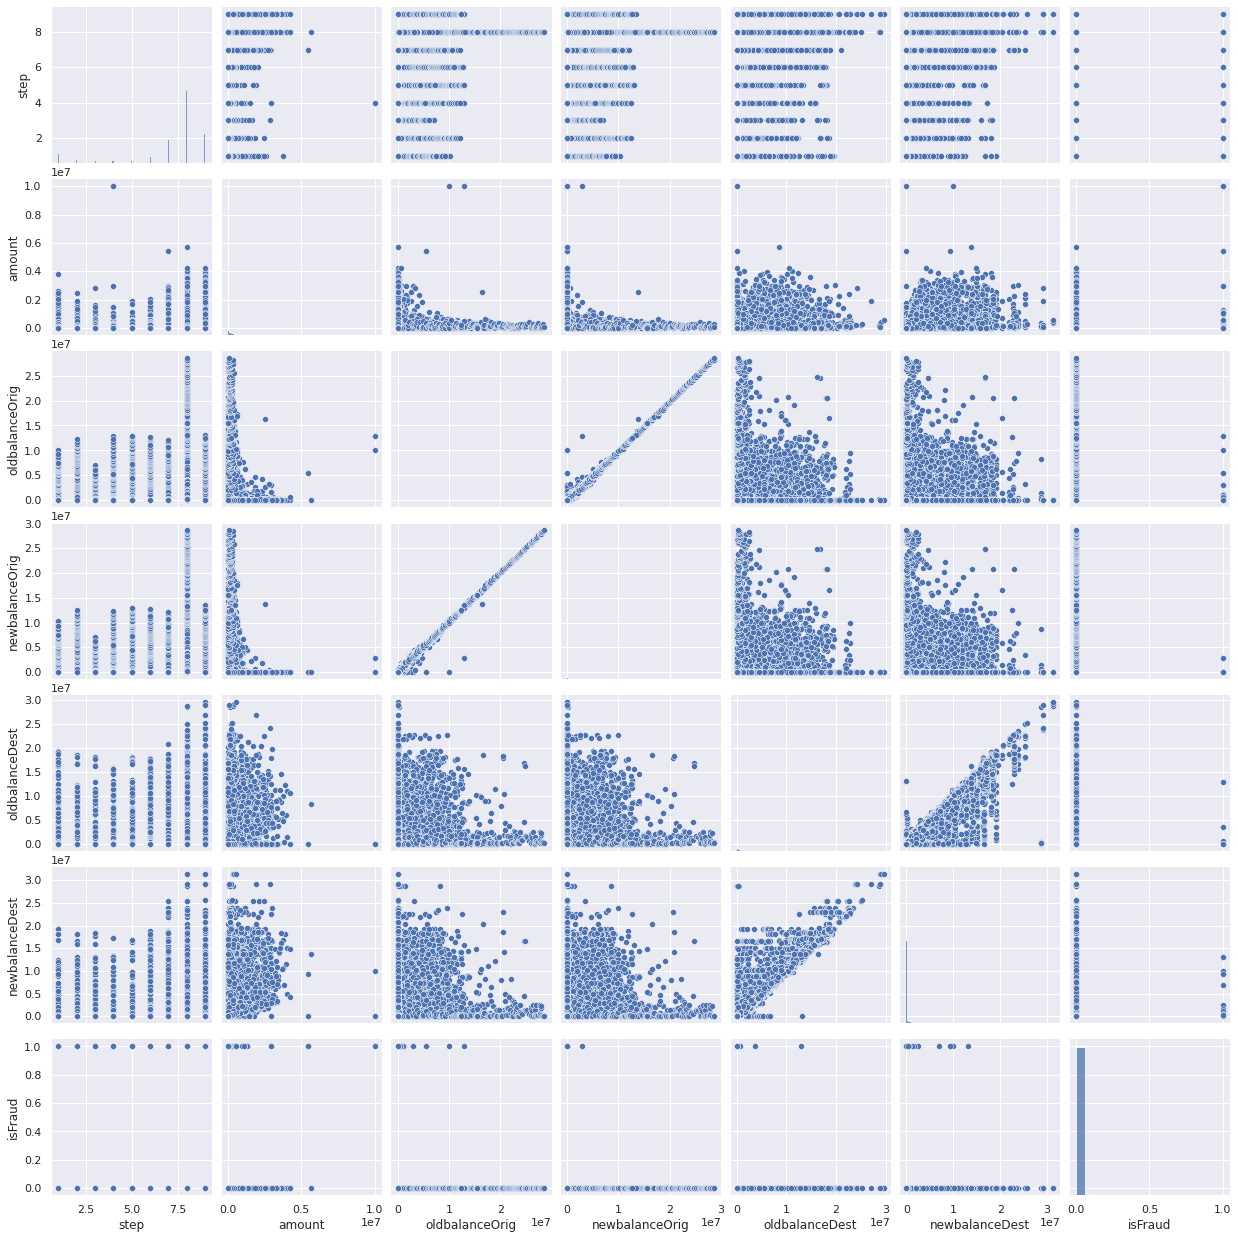

In [20]:
sns.pairplot(df)

In [21]:

from scipy.stats import skew


In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [23]:
def transaction(values):
  train = sns.displot(values, kde = True,height=8,aspect=3)
  return train

In [24]:
transaction

<function __main__.transaction>

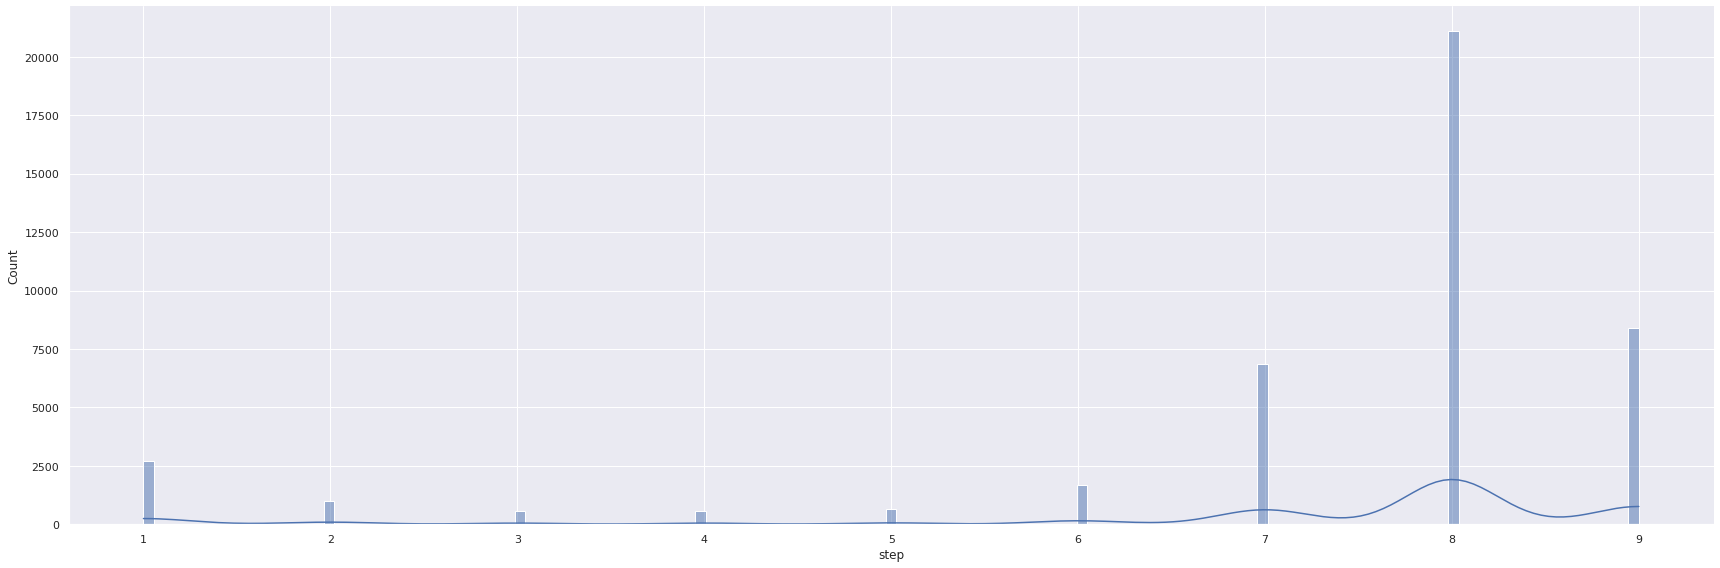

In [25]:
transaction(df['step'])

In [26]:
print(df['step'].skew())

-1.9846634276119837


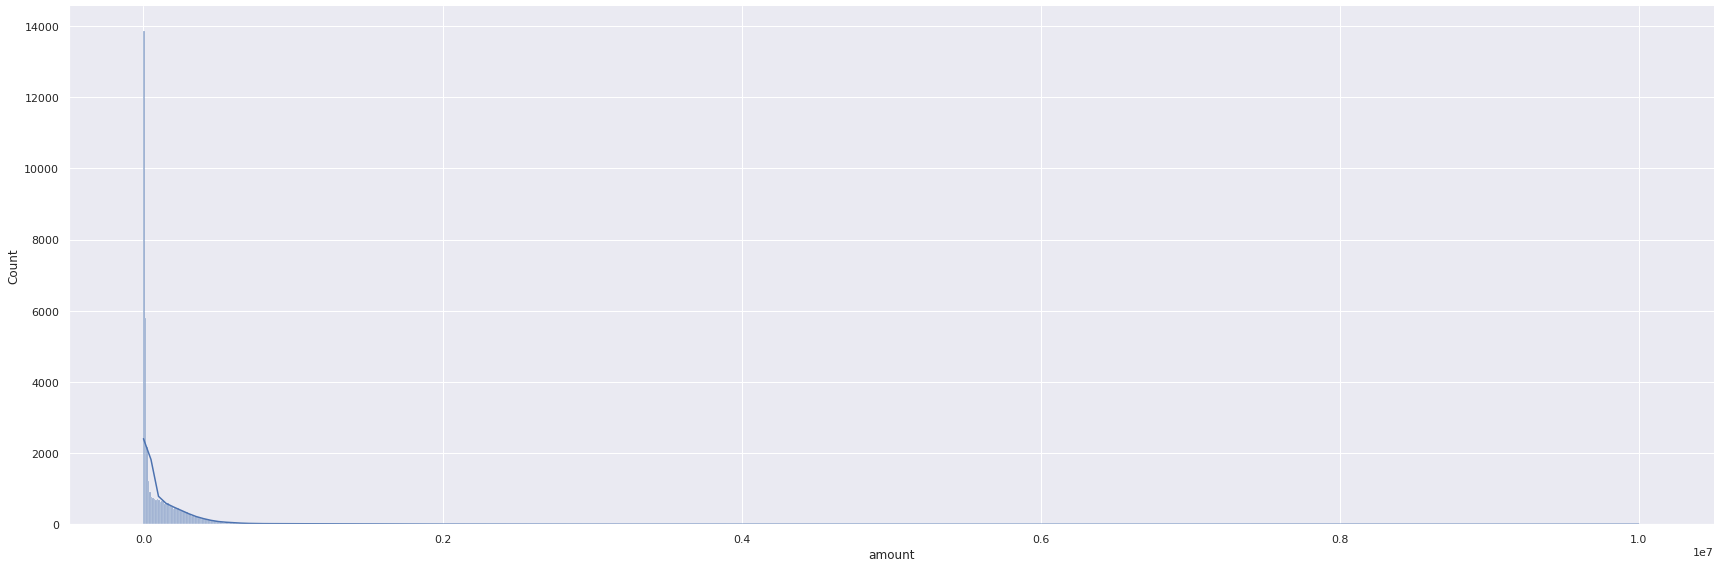

In [27]:
transaction(df['amount'])

In [28]:
print(df['amount'].skew())

6.249753947643225


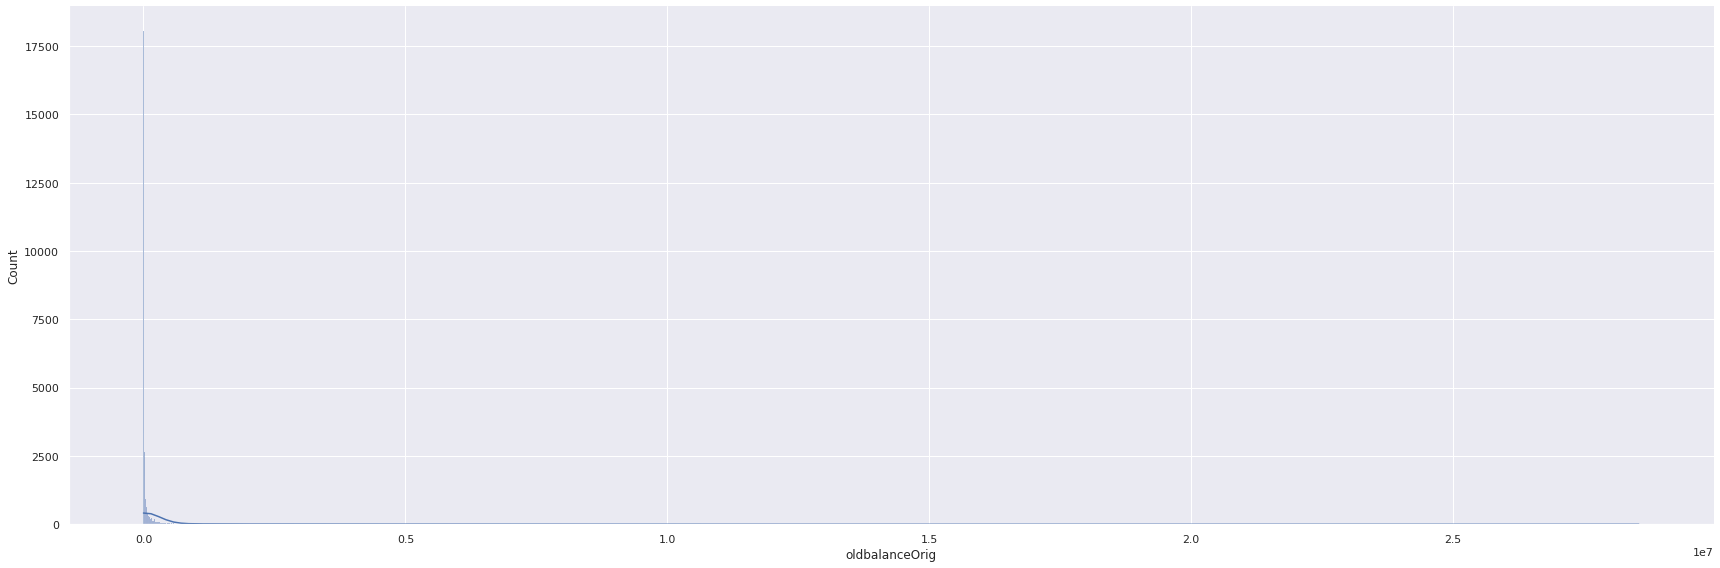

In [29]:
transaction(df['oldbalanceOrig'])

In [30]:
print("The skewness value of oldbalanceOrig : ", df['oldbalanceOrig'].skew())

The skewness value of oldbalanceOrig :  4.613074334645996


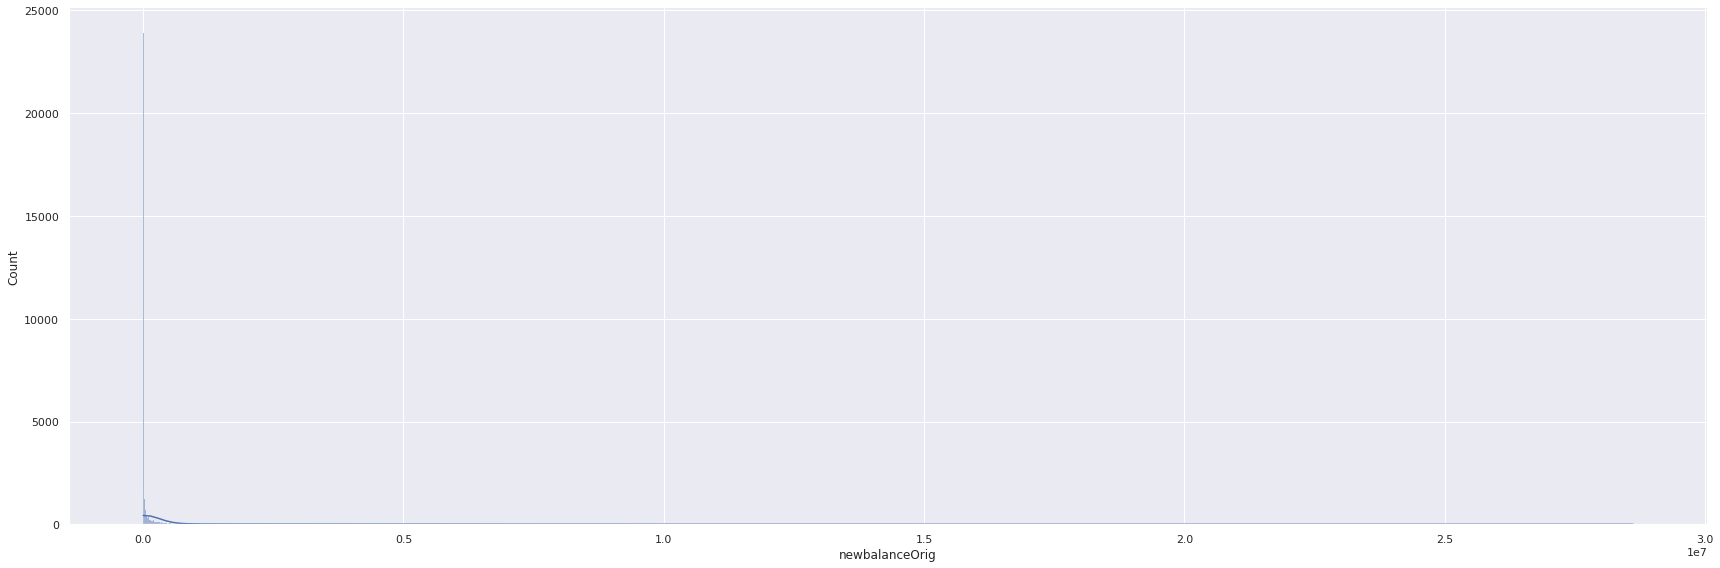

In [31]:
transaction(df['newbalanceOrig'])

In [32]:
print('the skewness of newbalanceOrig : ',df['newbalanceOrig'].skew())

the skewness of newbalanceOrig :  4.534006070400126


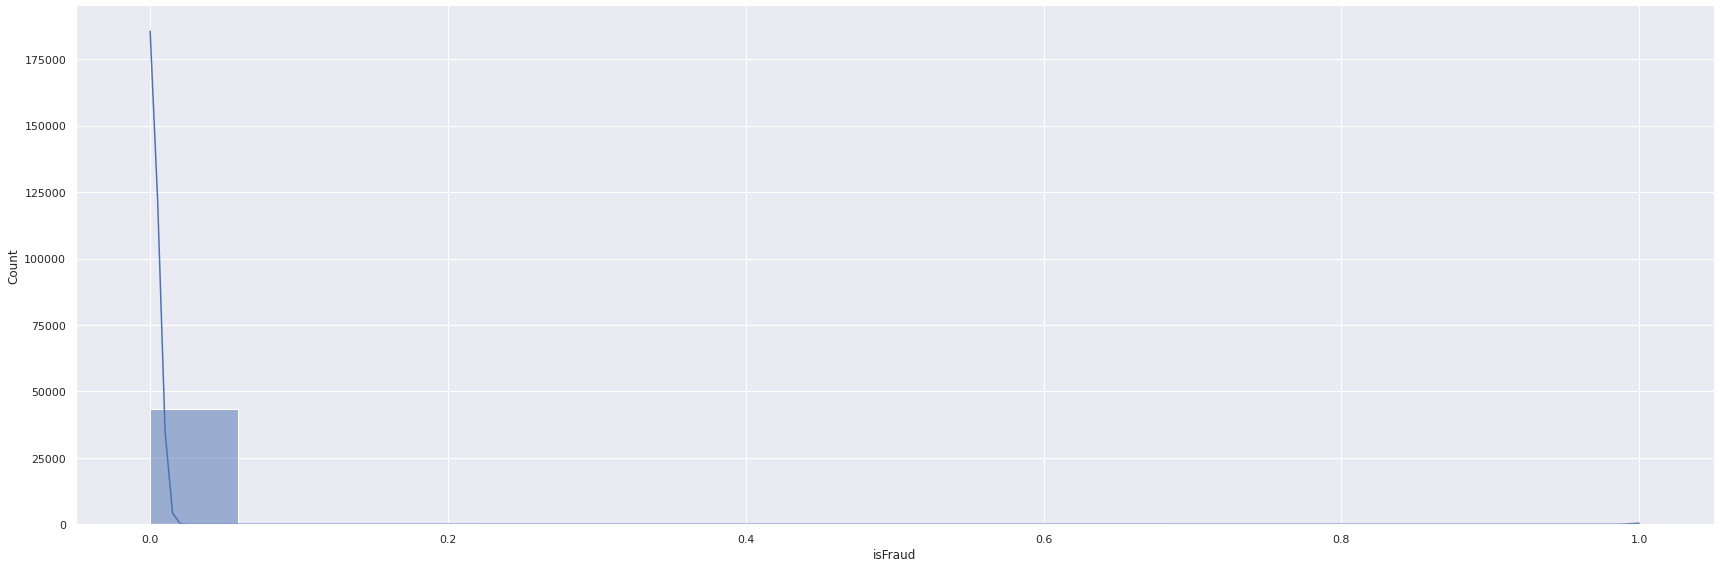

In [33]:
transaction(df['isFraud'])

In [34]:
print("The skewness value of is fraud : ",df['isFraud'].skew())

The skewness value of is fraud :  21.439222451999218


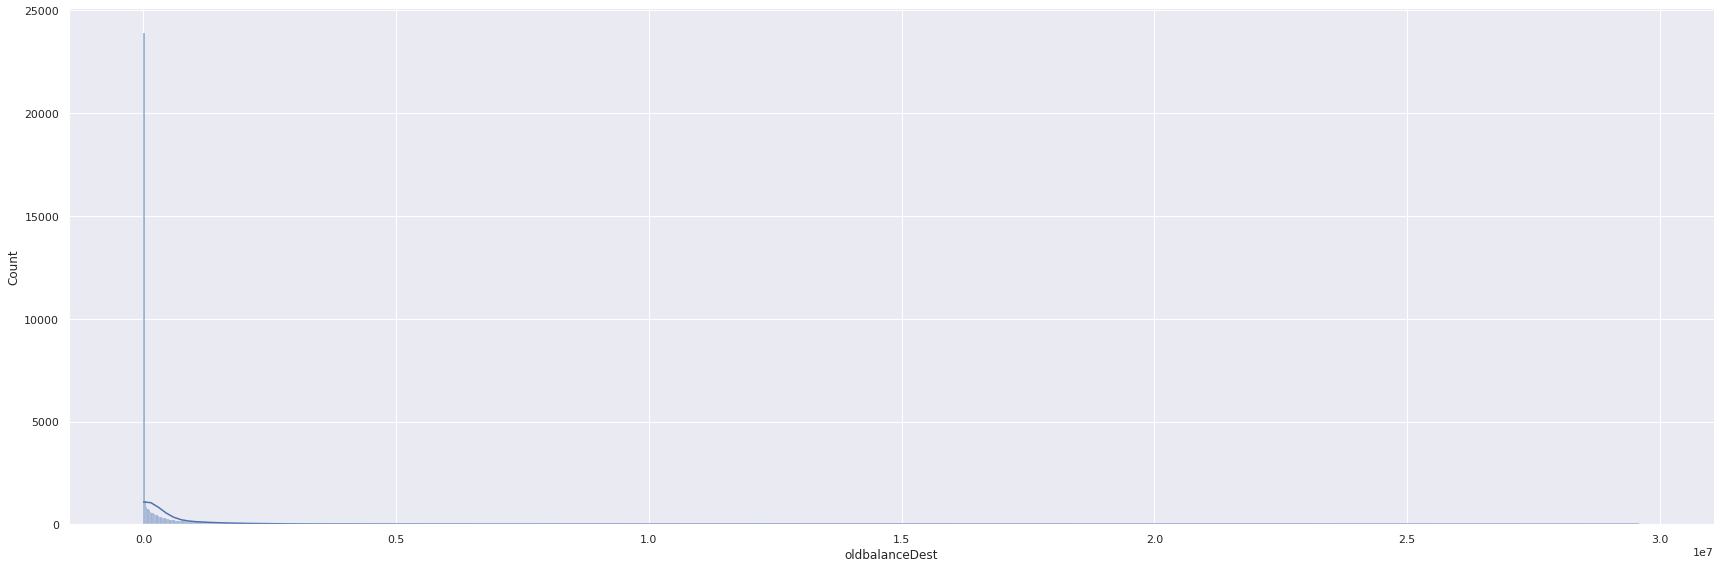

In [35]:
transaction(df['oldbalanceDest'])

In [36]:
print("the skewness of oldbalanceDest : ",df['oldbalanceDest'].skew())

the skewness of oldbalanceDest :  4.734078235205833


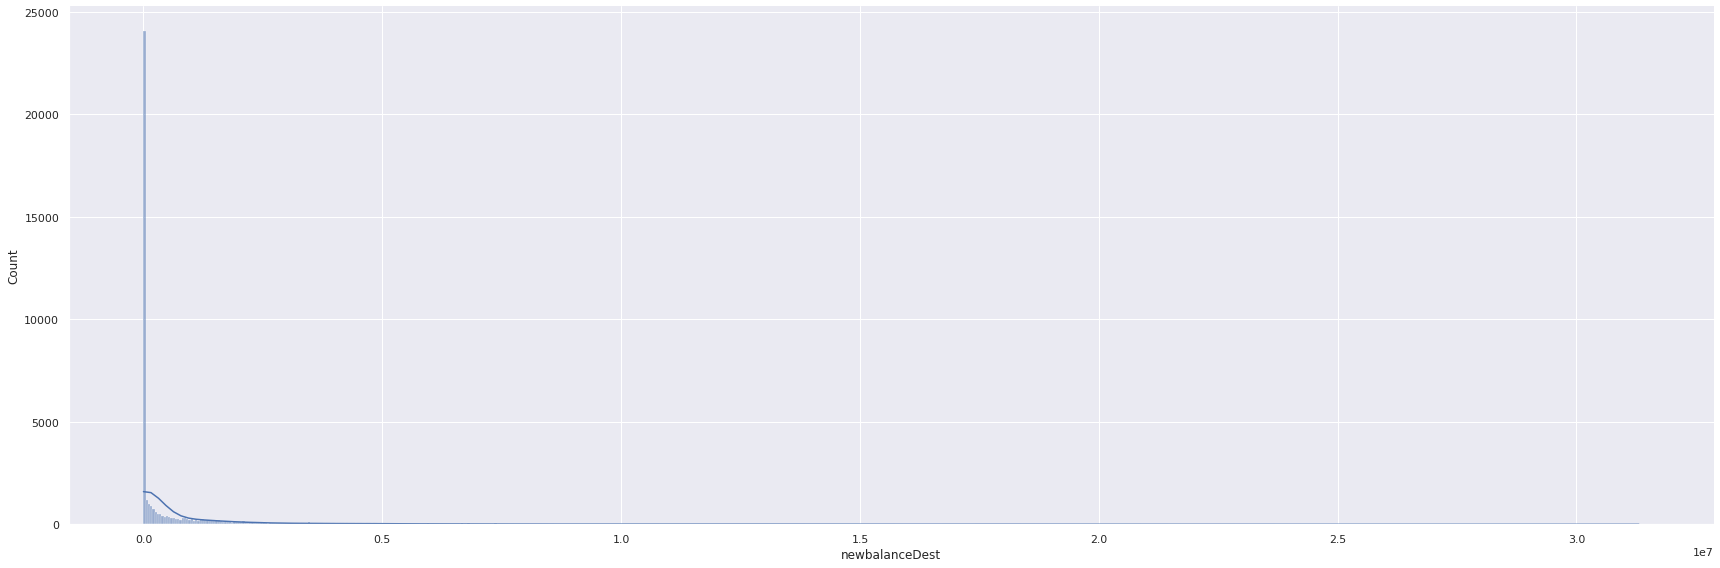

In [37]:
transaction(df['newbalanceDest'])

In [38]:
print("the skewness value of newbalanceDest: ",df['newbalanceDest'].skew())

the skewness value of newbalanceDest:  4.061997720975301


In [39]:
def skewness(values):
  sol = np.log(values)
  result = print("the skewness of graph",sol.skew())
  plot = sns.displot(sol,kde=True,height=8,aspect=3)
  return sol, plot,result

the skewness of graph -2.678439662999163


(0        0.000000
 1        0.000000
 2        0.000000
 3        0.000000
 4        0.000000
            ...   
 43481    2.197225
 43482    2.197225
 43483    2.197225
 43484    2.197225
 43485    2.197225
 Name: step, Length: 43486, dtype: float64,
 None)

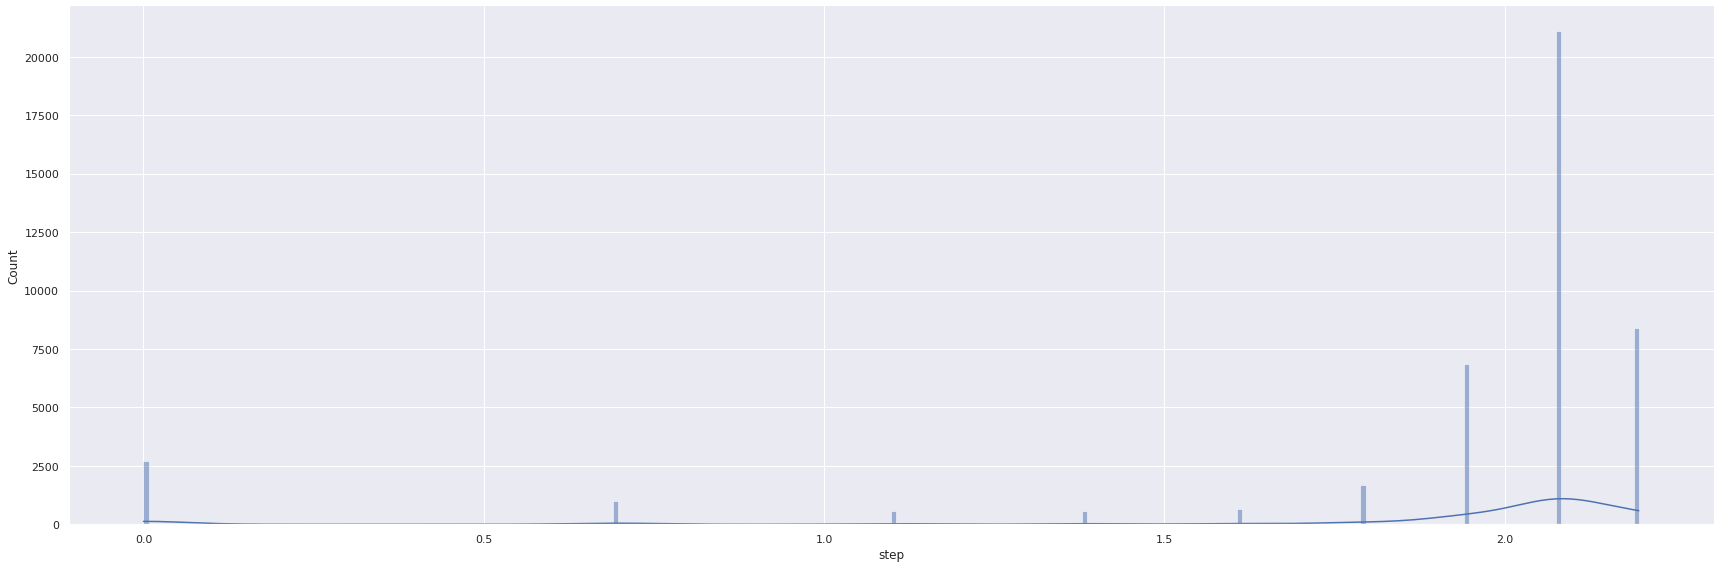

In [40]:
skewness(df['step'])

the skewness of graph -0.2359917289049005


(0         9.194174
 1         7.530630
 2         5.198497
 3         5.198497
 4         9.364617
            ...    
 43481     9.542788
 43482     8.530948
 43483    14.406517
 43484     9.690708
 43485    12.675548
 Name: amount, Length: 43486, dtype: float64,
 None)

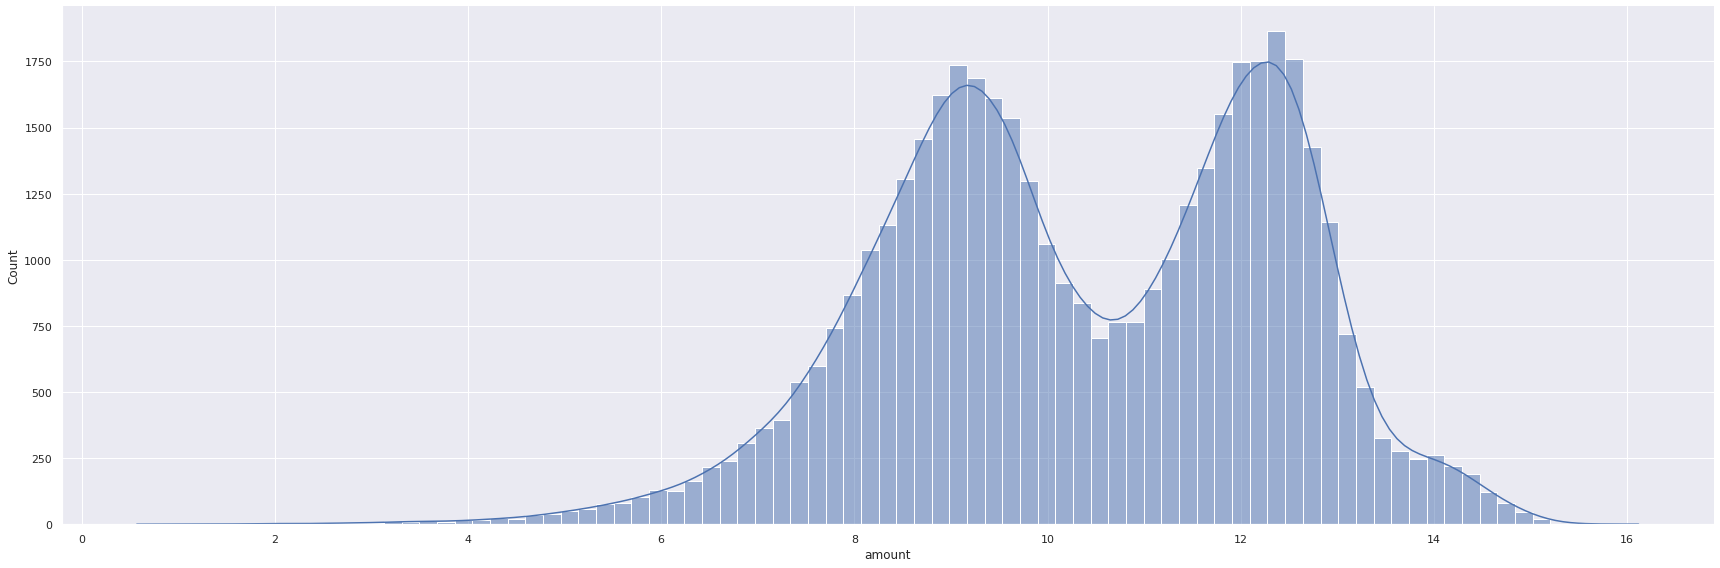

In [41]:
skewness(df['amount'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


the skewness of graph nan


(0        11.984780
 1         9.872240
 2             -inf
 3             -inf
 4        10.305141
            ...    
 43481         -inf
 43482         -inf
 43483         -inf
 43484         -inf
 43485          NaN
 Name: newbalanceOrig, Length: 43486, dtype: float64,
 None)

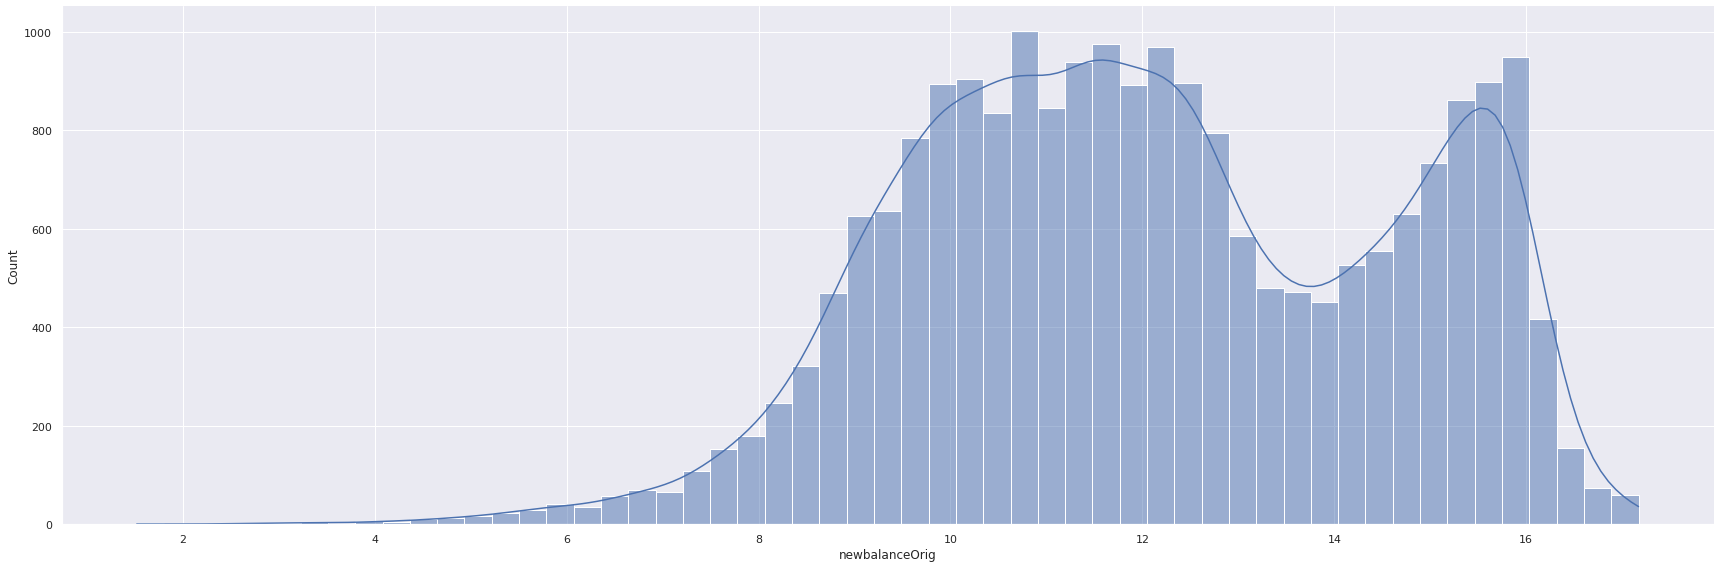

In [42]:
skewness(df['newbalanceOrig'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


the skewness of graph nan


(0        12.044353
 1         9.964065
 2         5.198497
 3         5.198497
 4        10.634749
            ...    
 43481     5.192957
 43482         -inf
 43483     8.119696
 43484     9.418655
 43485          NaN
 Name: oldbalanceOrig, Length: 43486, dtype: float64,
 None)

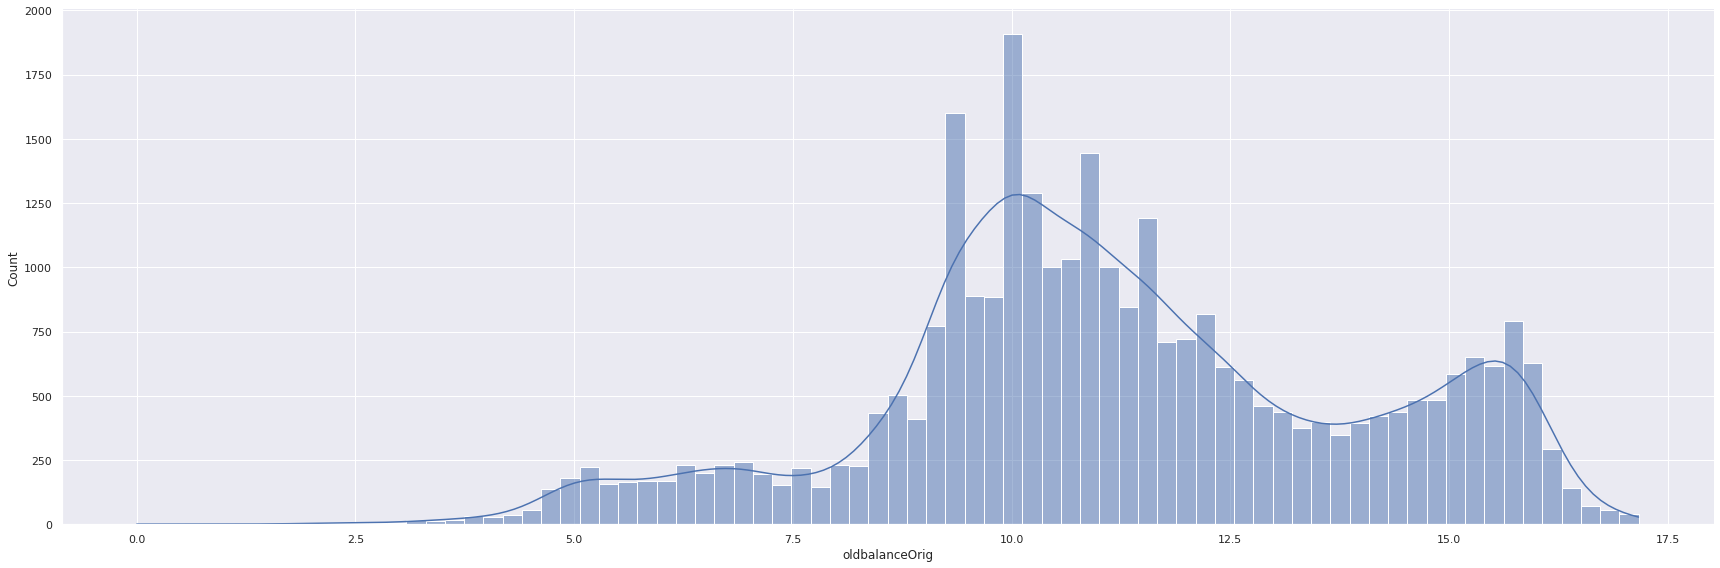

In [43]:
skewness(df['oldbalanceOrig'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


the skewness of graph nan


(0       -inf
 1       -inf
 2        0.0
 3        0.0
 4       -inf
         ... 
 43481   -inf
 43482   -inf
 43483   -inf
 43484   -inf
 43485    NaN
 Name: isFraud, Length: 43486, dtype: float64,
 None)

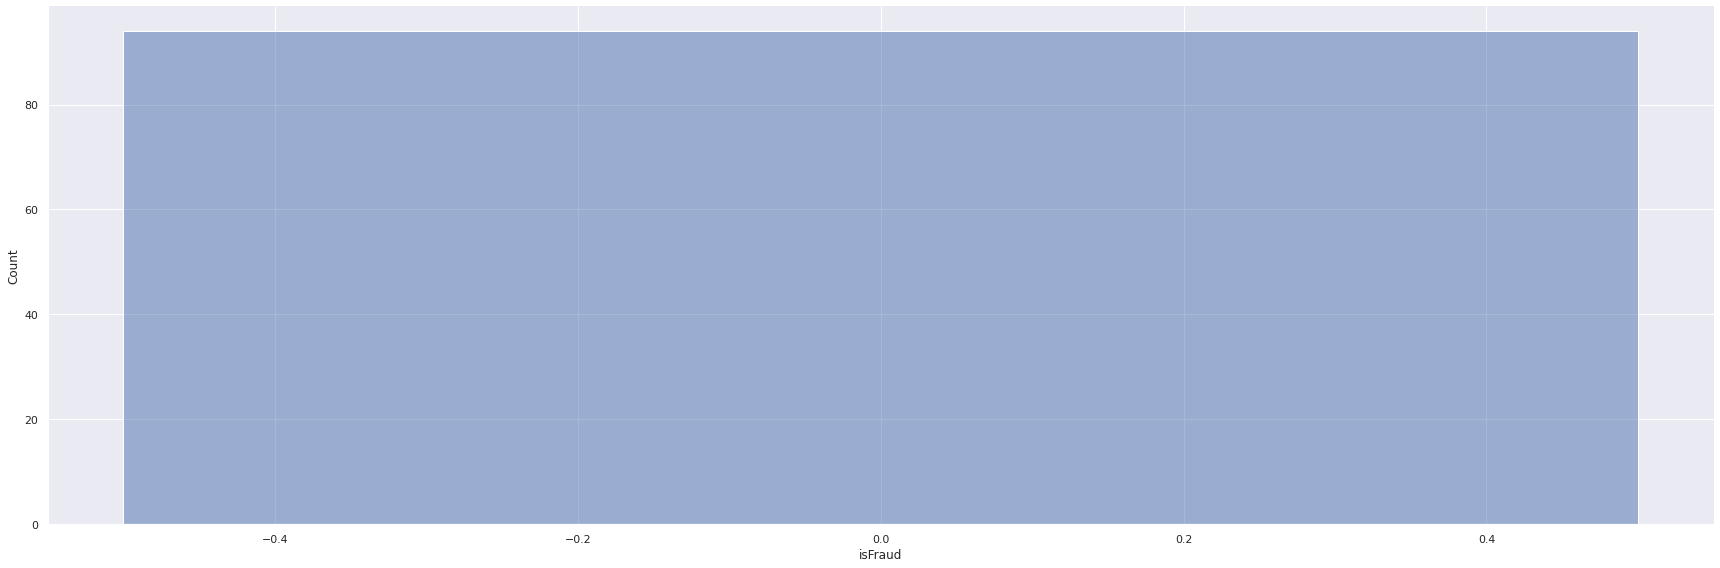

In [44]:
skewness(df['isFraud'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


the skewness of graph nan


(0             -inf
 1             -inf
 2             -inf
 3         9.960907
 4             -inf
            ...    
 43481         -inf
 43482         -inf
 43483    11.964206
 43484         -inf
 43485          NaN
 Name: oldbalanceDest, Length: 43486, dtype: float64,
 None)

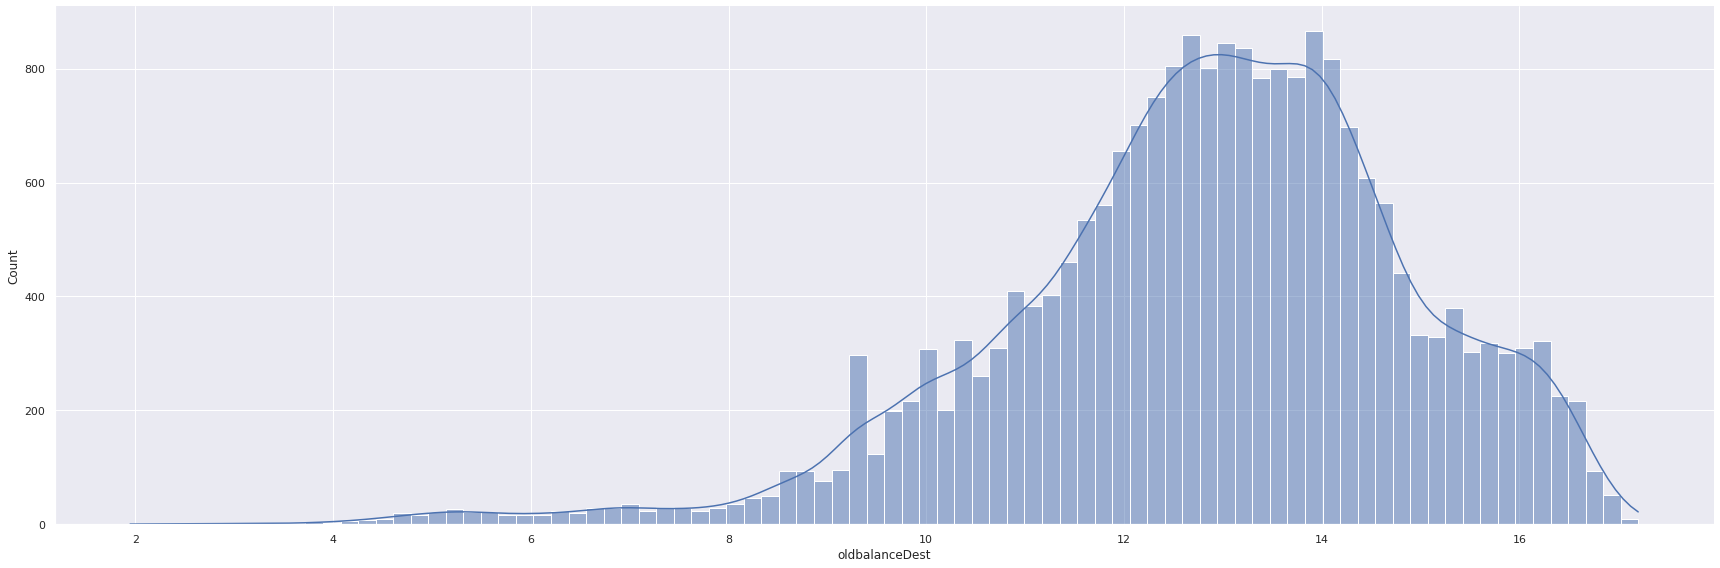

In [45]:
skewness(df['oldbalanceDest'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


the skewness of graph nan


(0             -inf
 1             -inf
 2             -inf
 3             -inf
 4             -inf
            ...    
 43481         -inf
 43482         -inf
 43483    14.489901
 43484         -inf
 43485          NaN
 Name: newbalanceDest, Length: 43486, dtype: float64,
 None)

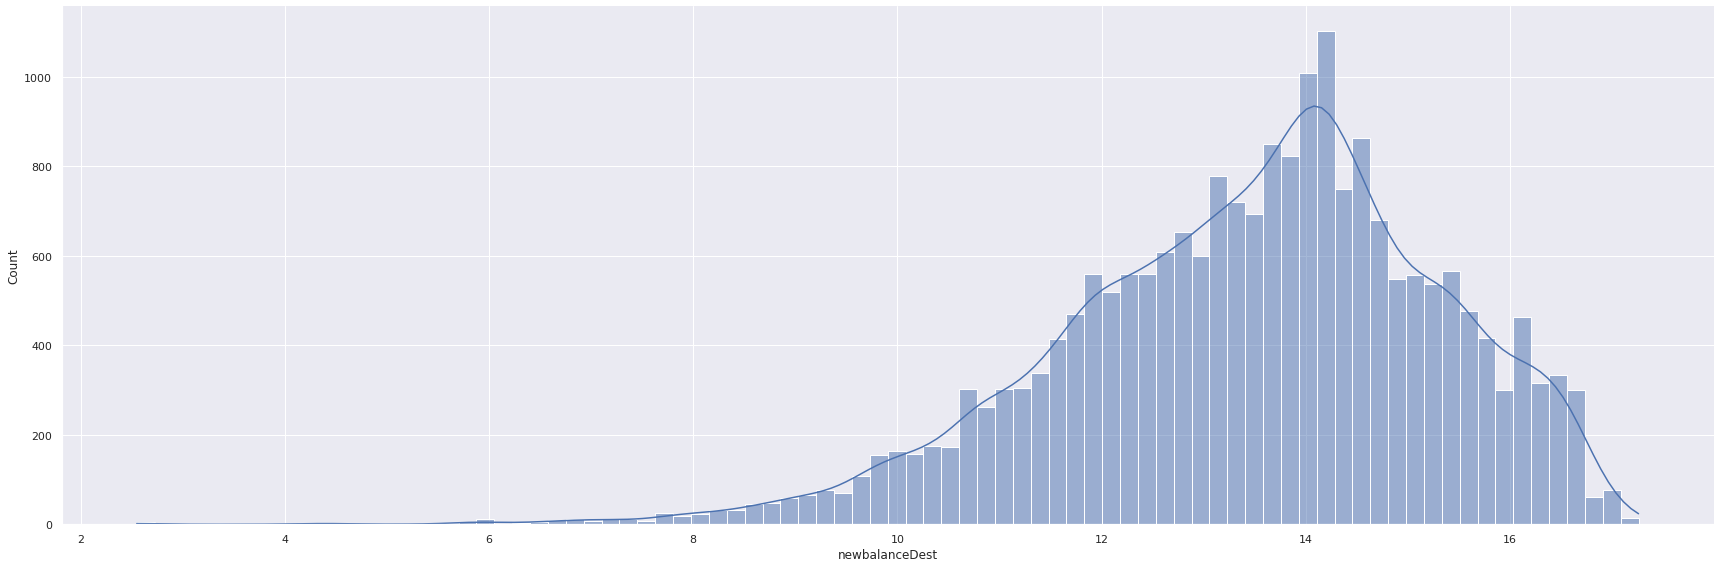

In [46]:
skewness(df['newbalanceDest'])

In [47]:
def outlier(value):

  Q1 = value.quantile(0.25)
  Q3 = value.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  plot2 = value.plot.box(autorange=True)
  lower_limit,upper_limit
  print("IQR,lower_limit,upper_limit")
  return IQR,lower_limit,upper_limit,plot2

In [48]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,43486.000000,4.348600e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,43485.000000
mean,7.222186,1.498805e+05,7.851523e+05,8.002601e+05,8.538569e+05,1.163557e+06,0.002162
std,2.109878,3.151117e+05,2.299386e+06,2.337749e+06,2.469631e+06,2.953350e+06,0.046444
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.000000,7.173425e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.000000,2.909118e+04,1.791600e+04,0.000000e+00,8.900000e+01,0.000000e+00,0.000000
75%,8.000000,1.807075e+05,1.426799e+05,1.509581e+05,4.515732e+05,8.283621e+05,0.000000
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.958454e+07,3.130692e+07,1.000000


In [50]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [51]:
df_ohe = pd.get_dummies(df,columns=['type'])

In [52]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [53]:
df_ohe.isnull().sum()

step              0
amount            0
nameOrig          1
oldbalanceOrig    1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [54]:
df1=df_ohe.fillna(value=0.0)

In [55]:
df1.head()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0,0,0,1,0


In [56]:
df1.isnull().sum().sum()

0

In [57]:
x = df1.drop(['isFraud','nameOrig','nameDest'],axis=1)
y = df1['isFraud']

In [58]:
df1

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43481,9,13943.77,C1998838780,180.0,0.00,M324211550,0.00,0.00,0.0,0,0,0,1,0
43482,9,5069.25,C53113829,0.0,0.00,M971933851,0.00,0.00,0.0,0,0,0,1,0
43483,9,1805804.86,C1358645345,3360.0,0.00,C1329956939,157032.18,1962837.03,0.0,0,0,0,0,1
43484,9,16166.68,C1538881731,12316.0,0.00,M199007498,0.00,0.00,0.0,0,0,0,1,0


In [59]:
df1.head()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0,0,0,1,0


In [60]:
print(x)

       step      amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
0         1     9839.64        170136.0       160296.36            0.00   
1         1     1864.28         21249.0        19384.72            0.00   
2         1      181.00           181.0            0.00            0.00   
3         1      181.00           181.0            0.00        21182.00   
4         1    11668.14         41554.0        29885.86            0.00   
...     ...         ...             ...             ...             ...   
43481     9    13943.77           180.0            0.00            0.00   
43482     9     5069.25             0.0            0.00            0.00   
43483     9  1805804.86          3360.0            0.00       157032.18   
43484     9    16166.68         12316.0            0.00            0.00   
43485     9   319830.85             0.0            0.00            0.00   

       newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0                0.

In [61]:
print(y)

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
43481    0.0
43482    0.0
43483    0.0
43484    0.0
43485    0.0
Name: isFraud, Length: 43486, dtype: float64


In [62]:
print(x.ndim)
print(y.ndim)

2
1


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state = 0)


In [64]:
x_train.shape


(34788, 11)

In [65]:
y_train.shape

(34788,)

In [66]:
x_test.shape

(8698, 11)

In [67]:
y_test.shape

(8698,)

In [68]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression

In [69]:
LR = LogisticRegression(fit_intercept=True)
LR.fit(x_train,y_train)
LogisticRegression()
LR.score(x_test,y_test)


0.998045527707519

In [70]:
pred= LR.predict(x_test)

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8680
         1.0       0.67      0.11      0.19        18

    accuracy                           1.00      8698
   macro avg       0.83      0.56      0.59      8698
weighted avg       1.00      1.00      1.00      8698



In [72]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)) )
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 76
Before OverSampling, counts of label '0': 34712


In [73]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
rus = RandomUnderSampler()
x_res, y_res = rus.fit_resample(x_train, y_train.ravel())
print("After underSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After underSampling, counts of label '0': {}".format(sum(y_res == 0)))

After underSampling, counts of label '1': 76
After underSampling, counts of label '0': 76


In [74]:
lr=LogisticRegression(fit_intercept=True)
lr.fit(x_res,y_res)

prediction = lr.predict(x_test) 
lr.score(x_test,y_test)

0.8572085536905035

In [75]:
print(classification_report,(y_test,prediction))

<function classification_report at 0x7f30beb36d40> (13130    0.0
41969    0.0
41615    0.0
31077    0.0
6137     0.0
        ... 
5481     0.0
32809    0.0
27291    0.0
31577    0.0
21589    0.0
Name: isFraud, Length: 8698, dtype: float64, array([0., 0., 0., ..., 0., 0., 0.]))


In [76]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(x_res,y_res)
rf.score(x_test,y_test)

0.9134283743389285

In [77]:
predict1_rf = rf.predict(x_test)
print(classification_report,(y_test,predict1_rf))

<function classification_report at 0x7f30beb36d40> (13130    0.0
41969    0.0
41615    0.0
31077    0.0
6137     0.0
        ... 
5481     0.0
32809    0.0
27291    0.0
31577    0.0
21589    0.0
Name: isFraud, Length: 8698, dtype: float64, array([1., 0., 0., ..., 0., 0., 0.]))


In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

In [87]:
sm = SMOTE(random_state=50)
x_res_sm, y_res_sm = sm.fit_resample(x_train, y_train)
LR3=LogisticRegression(fit_intercept=True)
LR3.fit(x_res_sm, y_res_sm)
LogisticRegression()
LR3.score(x_res_sm,y_res_sm)
prediction3 = LR3.predict(x_test)
print(classification_report(y_test, prediction3))
              

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      8680
         1.0       0.02      0.94      0.04        18

    accuracy                           0.91      8698
   macro avg       0.51      0.92      0.49      8698
weighted avg       1.00      0.91      0.95      8698

